<a href="https://colab.research.google.com/github/hseongeun/projectmanager/blob/main/9_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 비지도 학습

### 토픽 모델링
텍스트에 대한 비지도학습

잠재변수(latent variable) : 직접 관찰되지 않으나 모델 내에서 존재하는 것으로 가정하는 변수
- 사랑
- 성격

토픽모델링은 '토픽(topic)' 이라는 잠재 변수를 가정하여 문서의 단어 빈도 등을 모델링
- 여기서 토픽의 의미 : 어떠한 수치 / 단어, 형태소

### 토픽 모델링의 방법
행렬 분해에 의한 방법
- Latent Semantic Analysis
- Non-negative Matrix Factorization

확률 분포에 의한 방법
- Latent Dirichlet Allocation

### 잠재 의미 분석(LSA, Latent Semantic Analysis)
문서 단어 행렬(표)을 여러 행렬의 곱으로 분해하는 방법
- 문서-토픽 행렬 : 문서별 토픽
- 토픽-단어 행렬 : 단어별 토픽

단어-분석 = 토픽-문서 * 단어-토픽

사람-행동(사람별로 행동이 어떤지 / mbti)

 = 사람-성격(사람은 어떤 성격을 가지고 있는지) * 행동-성격(어떤 성격을 가진 사람은 어떤 행동을 하는지

토픽이 연속 변수라고 가정

여러 토픽들에 가중치를 곱하여 더하면 문서 단어 행렬이 된다고 가정

토픽들은 단어 빈도의 분산을 설명

수학적으로는 주성분분석과 거의 비슷

In [1]:
import pandas as pd
df = pd.read_excel('patents.xlsx')
df.head()

,status,ko_title,en_title,abstract
0,등록,개운죽 잎 및 줄기 추출물을 함유하는 컨디셔닝 샴푸 조성물 및 이를 이용한 컨디셔닝...,Conditioning shampoo composition containing le...,본 발명은 개운죽 잎 및 줄기 추출물을 함유하여 모발의 윤기와 부드러움의 지속력을 ...
1,공개,탈모 케어 헤어 샴푸 조성물,A SHAMPOO COMPOSITION FOR CARING HAIR LOSS,"본 발명은 탈모 케어 헤어 샴푸 조성물에 관한 것으로, 보다 상세하게는 소리쟁이 추..."
2,등록,천연재료 성분을 함유한 샴푸,shampoo including natural material,"본 발명의 목적은 부작용이 작으면서도 모발이 청결하고, 영양상태를 양호하게 유지할 ..."
3,등록,물 없이 이용 가능한 드라이 샴푸,Dry Shampoo usable without water,본 발명은 물을 실질적으로 사용하지 아니하고도 이용 가능한 모발과 두피를 깨끗하게 ...
4,등록,구증구포 인삼 추출물과 천연 한방 추출물을 함유하는 육모 및 양모 촉진용 화장료 조...,Shampoo and essence using cosmetic composition...,본 발명은 알콜 및 유화제에서 선택된 어느 하나 이상; 양이온성 계면활성제; 및 분...


In [2]:
df.abstract.iloc[0]

'본 발명은 개운죽 잎 및 줄기 추출물을 함유하여 모발의 윤기와 부드러움의 지속력을 향상 시킬 수 있도록 도와 주는 개운죽 잎 및 줄기 추출물을 함유하는 컨디셔닝 샴푸 조성물 및 이를 이용한 컨디셔닝 샴푸 제조방법에 관한 것으로, 본 발명은 정제수, 다이소듐라우레스설포석시네이트, 코카마이드미파, 소듐코코일이세니오네이트, 라우릴글루코사이드, 라우릴베타인, 개운죽 잎 및 줄기 추출물, 라우릴하이드록시설테인을 포함한다.'

In [5]:
df.shape


(439, 4)

In [3]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 47.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=308ef5cd8feee7443e15b55ff6760dbe12cd84e7b00f63bc5f3d61db27a5d600
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


### LSA 실습 : 명사 추출 함수

In [6]:
import kiwipiepy
kiwi = kiwipiepy.Kiwi()
def extract_nouns(text):
    for token in kiwi.tokenize(text):
        if token.tag in {'NNG', 'NNP'}:
            yield token.form

In [7]:
list(extract_nouns('샴푸로 머리를 감으니 시원하다'))

['샴푸', '머리']

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=extract_nouns, min_df=10) # 최소 10건의 특허에 나온 단어만
dtm = cv.fit_transform(df.abstract)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [9]:
# 고빈도 단어 보기
word_count = pd.DataFrame({
'word': cv.get_feature_names_out(),
'count': dtm.sum(axis=0).flat      # .flat : 한줄로
})
word_count.sort_values('count', ascending=False).head(20)

,word,count
146,샴푸,973
84,물,744
93,발명,671
262,조성,617
266,중량,546
138,상기,484
81,모발,476
285,추출물,473
314,포함,447
115,부,424


In [10]:
# SVD 적용
# 문서 단어 행렬에 SVD 적용, 100차원으로 축소
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=1234)
doc_emb = svd.fit_transform(dtm)

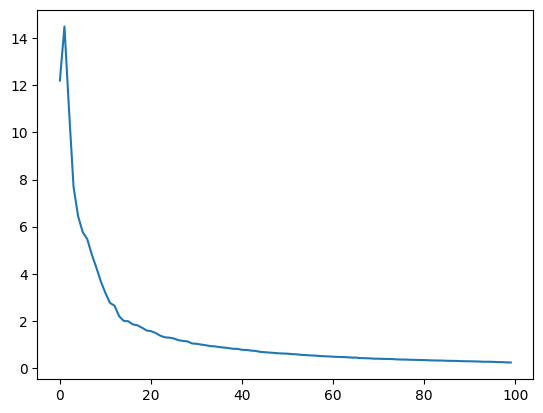

In [11]:
# 스크리 플롯(scree plot)
# 경사가 완만해지기 시작하는 부분에서 자름
import matplotlib.pyplot as plt
plt.plot(svd.explained_variance_)
# 15쯤인 거 확인 -> n_components를 15로 수정해 줌

In [12]:
svd = TruncatedSVD(n_components=15, random_state=1234)
doc_emb = svd.fit_transform(dtm)

In [14]:
# 문서 임베딩 = 디지털 지문
doc_emb[0]  # df.abstract.iloc[0]에 있는 글을 단어별로 추출해서 숫자로 표현한 것

array([ 3.55671309, -1.07082997, -1.28625528,  0.91866455, -0.48966027,
       -0.60603371, -0.53578584, -1.05309671, -1.47774955, -0.21321819,
        0.37129185, -1.57235932,  0.71757894, -0.45739868, -0.1774905 ])

In [ ]:
# 0번(개운죽)과 비슷한 내용을 가진 인덱스를 보여줌
# how? 문서 임베딩을 이용해서 -> 임베딩해서 0번과 숫자 패턴이 비슷한 인덱스를 찾아내는 것

import numpy as np
from sklearn.metrics.pairwise import cosine_distances
doc_id = 0
sims = cosine_distances(doc_emb[[doc_id]], doc_emb).flatten()   # 유사도 계산
sim_idx = np.argsort(sims)[:10]   # argsort : 비슷한 순으로 정렬 / 상위 10개
df.iloc[sim_idx]

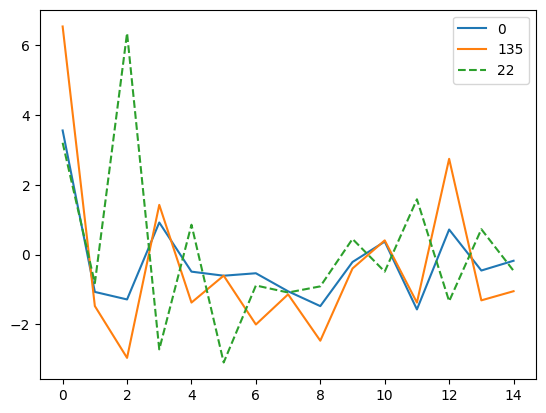

In [16]:
plt.plot(doc_emb[0], label='0')
plt.plot(doc_emb[135], label='135')  # 패턴이 제일 비슷
plt.plot(doc_emb[22], '--', label='22')  # 패턴이 제일 다른
plt.legend()

In [17]:
np.argsort(sims)[-1]

22

## 단어 임베딩

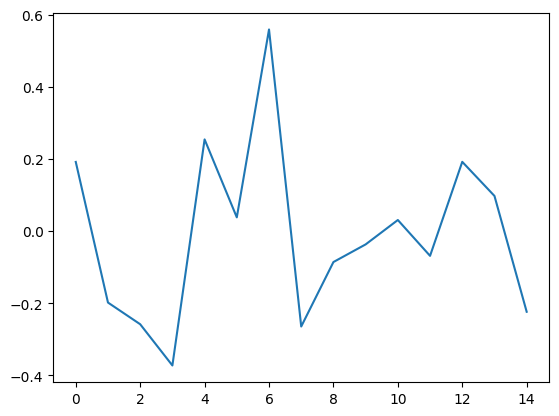

In [18]:
word_emb = svd.components_.T

# 단어 text의 번호
words = cv.get_feature_names_out().tolist()
i = words.index('모발')

# 단어와 각 토픽의 관련도를 시각화
plt.plot(word_emb[i])

In [19]:
# 코사인 유사도 구하기
from sklearn.metrics.pairwise import cosine_distances
dist = cosine_distances(word_emb)

import numpy as np
s = np.argsort(dist) # i번째 단어와 유사도 순으로 정렬
related = s[i, :10] # 가장 유사도가 높은 10개
for j in related:
    print(words[j])

모발
손상
염색
염모제
트리트먼트
윤기
도포
건조
보호
클렌징


In [20]:
s

array([[  0,  52, 163, ..., 150,  68, 184],
       [  1, 279, 240, ...,  30, 149, 180],
       [  2, 348,  53, ...,   4, 253,   9],
       ...,
       [363,  80,  27, ...,  29, 332,  24],
       [364, 195,  79, ..., 181, 202, 254],
       [365, 154, 173, ..., 362, 329, 284]])

## 문장 BERT(SBERT)

Sentence BERT

문장 임베딩을 위한 BERT 모형

siamese neural network : 두 개의 동일한 BERTBERT에 문장을 입력하고 그 출력을 바탕으로 학습

모든 토큰의 출력에 Mean Pooling

과제의 종류에 따라 다른 목적 함수 손실 함수 를 사용
- 분류
- 회귀
- 삼중항

삼중항 손실(triplet loss)
대조 손실의 확장

a, p, n 3개의 텍스트를 사용
- a, p는 같은 내용을 다루는 텍스트, n은 다른 내용을 다루는 텍스트
- a의 임베딩이 n보다 p에 가깝게출력하도록 학습
- n이 가깝게 나왔다면 조정 -> n이 멀고 p가 가깝게

적절한 난이도의 삼중항 찾기
- a와 n이 너무 다르면 학습이 전혀 안됨
- a와 n이 너무 비슷하면 데이터가 잘못되었거나(예: 같은 내용이 다른 내용으로 잘못 레이블링) 특이 사례일 수 있음
- 너무 쉽거나 너무 어렵지 않은 정도의 semi hard data data를 찾아 학습

https://huggingface.co/ -> 상단 메뉴 models
-> Sentence Similarity
-> Languages -> Korean

In [2]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.3 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=34fd1a934b9c571953236d04aba1e67e980f0e5c9cfc7fcce0ca6d9de827826e
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [3]:
from sentence_transformers import SentenceTransformer

In [4]:
sbert = SentenceTransformer('jhgan/ko-sroberta-multitask')

In [7]:
# 문장 임베딩
import pandas as pd
df = pd.read_excel('patents.xlsx')

doc_emb = sbert.encode(df['abstract'])

### 문서 유사도

In [9]:
# 0번 문서와 비슷한 문서 보기
from sklearn.metrics.pairwise import cosine_distances
import numpy as np

doc_idx = 0
dists = cosine_distances(doc_emb[[doc_idx]], doc_emb).flatten()  # cosine_distances는 1-cosine_similarity
df.iloc[np.argsort(dists)[:10]]

# 유사도가 높을수록 거리 작음 -> 비슷한 문서가 앞쪽으로 정렬

,status,ko_title,en_title,abstract
0,등록,개운죽 잎 및 줄기 추출물을 함유하는 컨디셔닝 샴푸 조성물 및 이를 이용한 컨디셔닝...,Conditioning shampoo composition containing le...,본 발명은 개운죽 잎 및 줄기 추출물을 함유하여 모발의 윤기와 부드러움의 지속력을 ...
179,등록,생약추출액이 함유된 샴푸조성물,Shampoo composition,본 발명은 두피와 모발의 세정효과가 우수할 뿐만 아니라 두피와 모발의 건강을 유지시...
133,등록,천연 추출물이 함유된 기능성 샴푸 조성물 제조방법,Hair shampoo composition including natural ext...,본 발명은 집중 한방추출물을 복합적으로 적용하여 두피와 모발의 건강을 유지함은 물론...
182,등록,두피 및 모발 상태 개선용 샴푸 조성물,Shampoo composition for improving state of sca...,"본 발명은 두피 및 모발 상태 개선용 샴푸 조성물에 관한 것으로, 더욱 상세하게는 ..."
113,공개,친환경 원료를 사용한 두피 건강용 샴푸,Scalp health shampoo using eco-friendly ingred...,"본 발명은 편백잎, 솔잎, 잣나무잎, 녹차잎 및 병풀을 전해환원수와 혼합하여 발효시..."
196,등록,식물 추출물 및 천연 계면활성제를 함유하는 천연 샴푸 조성물,Natural shampoo composition comprising plant e...,"본 발명은 편백잎, 솔잎, 잣나무잎, 녹차잎 및 병풀을 전해환원수와 혼합하여 발효시..."
198,등록,탈모 방지 및 모발 개선 기능을 갖는 샴푸 조성물,Shampoo composition for preventing hair loss a...,"본 발명은, 약용식물워터를 포함하는 샴푸 조성물에 관한 것으로, 상기 약용식물워터는..."
111,등록,탈모방지 및 발모 촉진용 샴푸,A shampoo for promoting a growith of a hair an...,본 발명은 자생 식물 추출물과 천연 한약재 추출물을 주요 유효 성분으로 하여 비듬을...
107,등록,"황련추출물, 박하추출물 및 사해미네랄을 함유하는 비듬방지용 샴푸 조성물",The Dandruff Preventing Hair Cleaner Compositi...,본 발명은 자생 식물 추출물과 천연 한약재 추출물을 주요 유효 성분으로 하여 비듬을...
206,등록,샴푸 조성물,SHAMPOO COMPOSITION,"본 발명은 샴푸 조성물에 관한 것으로, 정제수, 글루카메이트, 폴리쿼터, 판테놀, ..."


비지도 학습 -> 정답이 없음 -> 정확도도 없음 -> 상황에 따라 유용함에 차이가 있음


### 키워드 추출
자주 나오는 단어 중에 문서와 가장 비슷한 단어를 찾음

문서의 내용과 비슷한 단어들이 키워드로 뽑힘

비슷비슷한 키워드들이 뽑힐 수 있음

해결책 :
- Max Sum Similarity
- Maximal Marginal Relevance

In [10]:
# 처음부터 GPU 설정을 안해서 일단 임의로 설정함
doc_idx = 0
words = ['샴푸', '물', '발명', '조성', '중량', '상기', '모발', '추출물', '포함', '부', '효과', '두피', '제조', '단계', '사용', '성분', '방지', '용기', '탈모', '방법']
word_emb = sbert.encode(words)
dists = cosine_distances(doc_emb[[doc_idx]], word_emb).flatten()
for i in np.argsort(dists)[:5]:
    print(words[i])

추출물
두피
모발
효과
방법


## 정보 검색

###정보 검색(information retrieva)
대량의 비정형 데이터 모음에서 조건에 맞는 자료를 찾는 것, 주로 텍스트 검색

In [11]:
import pandas as pd
df = pd.read_csv('neurips.zip') # CSV 압축되어 있으면 자동으로 풀어서 엶
df.head()

,year,title,abstract
0,2007,Competition Adds Complexity,It is known that determinining whether a DEC-P...
1,2007,Efficient Principled Learning of Thin Junction...,We present the first truly polynomial algorith...
2,2007,Regularized Boost for Semi-Supervised Learning,Semi-supervised inductive learning concerns ho...
3,2007,Simplified Rules and Theoretical Analysis for ...,We show that under suitable assumptions (prima...
4,2007,Predicting human gaze using low-level saliency...,"Under natural viewing conditions, human observ..."


In [13]:
# 검색어
query = {'natural', 'language'}

# 토큰화 함수
import re
def tokenize(text):
    text = text.lower() # 소문자로 변환
    return re.findall(r'\w{2,}', text) # 2글자 이상 단어 추출

In [14]:
# 토큰화 해줌
tokenize('It is known that determinining whether a DEC-P...')

['it', 'is', 'known', 'that', 'determinining', 'whether', 'dec']

### 순차 검색

In [15]:
%%time
results = []
for row in df.itertuples():
    words = set(tokenize(row.abstract))
    if query < words: # 검색어가 부분집합이면
        results.append(row.Index)

CPU times: user 368 ms, sys: 441 µs, total: 368 ms
Wall time: 380 ms


구글은 46억개를 검색하는데 0.43초가 걸림

-> 지금 코드는 비효율적으로 검색하고 있는 것

### 사전

In [16]:
d = {'a': 1, 'b': 2}
d['a']

1

In [21]:
a = list(range(10000000))

In [25]:
%%time
a.index(999999)

CPU times: user 17.3 ms, sys: 0 ns, total: 17.3 ms
Wall time: 22.1 ms


999999

In [23]:
b = dict(zip(a,a))

In [26]:
%%time
b[999999]

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 8.82 µs


999999

dic가 순차검색보다 훨씬 빠름

why? 해시테이블 때문

### 해시 테이블
해시 함수(hash function): 데이터를 고정된 크기의 값으로 매핑하는 함수(예: 공인인증서, 암호화폐(블록체인))
- 은행 거래 내역 -> 공인인증서 -> 해시값
- 블록1(여러 사람의 거래내역 일정량) -> 해시함수 -> 해시값1
- 해시값1 : 블록2 -> 해시함수 -> 해시값2
- 해시값2 : 블록3 -> 해시함수 -> 해시값3
- 해시값 하나를 해킹하면 2,3도 해야하고 점점 늘어남 -> 해킹 어려움

해시 테이블은 키의 해시 값을 인덱스로 사용하여 값을 저장

서로 다른 키가 같은 해시 값을 가질 경우(해시 충돌)
- 체이닝(chaining) : 연결 리스트 형태로 저장
- 오픈 어드레싱(open addressing) : 근처 다른 인덱스에 저장(Python에서 사용)

저장된 값이 많아지면 테이블 크기를 늘림
- Python의 경우 2/3이 차면 5만 개, 이하에서는 4배, 이상에서는 2배
- 값을 삭제할 경우 크기를 줄이지는 않음

속도는 빠르지만 저장 공간을 많이 사용

In [27]:
hash('안녕하세요')

3221938088286047293

### 인덱싱(indexing)
미리 각 단어를 포함하고 있는 문서들을 정리한 것

검색에는 인덱싱이 핵심! (속도를 줄이기 위해)

In [ ]:
from collections import defaultdict
index = defaultdict(set)

for row in df.itertuples():
    words = tokenize(row.abstract)
    for word in words:
        index[word].add(row.Index)

# 'language'가 들어있는 인덱스
index['language']

In [29]:
%%time
results = list(index['natural'] & index['language'])

CPU times: user 0 ns, sys: 29 µs, total: 29 µs
Wall time: 32.7 µs


앞에서 했던 순차검색과 인덱싱으로 한 속도를 비교하면 훨씬 줄어든 것을 확인할 수 있음

380 ms -> 32.7us